# Communication Data Findings

## Table of Content
- [Part-I : Data Wrangling](#wrangle)\
    [A.Gathering](#gather)\
    [B.Assessing](#assess)\
    [C.Cleaning](#clean)
- [Part-II : Data Visualization](#visual)\
    [A.Univariate](#uni)\
    [B.Bivariate](#bi)\
    [C.Multivariate](#multi)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import zipfile
%matplotlib inline

<a id = 'wrangle'></a>
## Part-I : Data Wrangling

In Data Wrangling, we'll **gather** the data, **acces** it and **clean** it, Basically we'll structure it in such a way that it will be feasibly for further analysis.

<a id = 'gather'></a>
> ### A.Data Gathering

In [2]:
# Requesting for .zip file

url = 'https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip'
req = requests.get(url)
url_content = req.content

trip_data = open('202003-baywheels-tripdata.zip', 'wb')
trip_data.write(url_content)
trip_data.close()

In [3]:
# Extracting .zip file

with zipfile.ZipFile('202003-baywheels-tripdata.zip', 'r') as myzip:
    myzip.extractall()

In [4]:
df = pd.read_csv('202003-baywheels-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


<a id='assess'></a>
> ### B. Data Assessing

In [5]:
# Sample of Dataframe
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
36622,2111,2020-03-06 09:05:28.1050,2020-03-06 09:40:39.3400,163.0,Lake Merritt BART Station,37.797320,-122.265320,187.0,Jack London Square,37.796248,-122.279352,12894,Customer,NaN
94046,489,2020-03-09 18:06:30,2020-03-09 18:14:40,NaN,NaN,37.761094,-122.436172,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,110177,Subscriber,clipper
73941,694,2020-03-05 15:25:57,2020-03-05 15:37:32,NaN,NaN,37.336406,-121.895223,NaN,NaN,37.336542,-121.882121,190302,Subscriber,app
14170,430,2020-03-13 16:33:55.2510,2020-03-13 16:41:05.8190,305.0,Ryland Park,37.342725,-121.895617,291.0,Autumn Parkway at Coleman Ave,37.341335,-121.903183,12871,Customer,NaN
96143,629,2020-03-04 08:04:06,2020-03-04 08:14:36,107.0,17th St at Dolores St,37.763015,-122.426497,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,586861,Subscriber,app
73073,155,2020-03-11 09:54:42,2020-03-11 09:57:18,310.0,San Fernando St at 4th St,37.335885,-121.885660,NaN,NaN,37.336027,-121.877377,572289,Subscriber,app
137702,95,2020-03-29 15:53:52,2020-03-29 15:55:27,481.0,O'Farrell St at Masonic Ave,37.781131,-122.447374,481.0,O'Farrell St at Masonic Ave,37.781131,-122.447374,456732,Subscriber,app
119439,870,2020-03-04 18:05:59,2020-03-04 18:20:30,75.0,Market St at Franklin St,37.773793,-122.421239,NaN,NaN,37.748766,-122.420221,909613,Subscriber,app
120211,473,2020-03-11 11:31:15,2020-03-11 11:39:09,NaN,NaN,37.774317,-122.414141,24.0,Spear St at Folsom St,37.789677,-122.390428,557324,Subscriber,app
128647,703,2020-03-06 16:04:19,2020-03-06 16:16:02,493.0,Folsom St at 7th St,37.776664,-122.407908,NaN,NaN,37.760369,-122.414785,218460,Customer,app


In [6]:
# Shape of Dataframe
df.shape

(176799, 14)

In [7]:
# Info about Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             176799 non-null  int64  
 1   start_time               176799 non-null  object 
 2   end_time                 176799 non-null  object 
 3   start_station_id         110696 non-null  float64
 4   start_station_name       111349 non-null  object 
 5   start_station_latitude   176799 non-null  float64
 6   start_station_longitude  176799 non-null  float64
 7   end_station_id           111097 non-null  float64
 8   end_station_name         111794 non-null  object 
 9   end_station_latitude     176799 non-null  float64
 10  end_station_longitude    176799 non-null  float64
 11  bike_id                  176799 non-null  int64  
 12  user_type                176799 non-null  object 
 13  rental_access_method     114269 non-null  object 
dtypes: f

In [8]:
# Checking for null values in dataframe
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           66103
start_station_name         65450
start_station_latitude         0
start_station_longitude        0
end_station_id             65702
end_station_name           65005
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
rental_access_method       62530
dtype: int64

In [9]:
# Checking for duplicates in dataframe
df.duplicated().sum()

0

In [10]:
df.user_type.value_counts()

Subscriber    96262
Customer      80537
Name: user_type, dtype: int64

In [11]:
df.rental_access_method.value_counts()

app        105515
clipper      8754
Name: rental_access_method, dtype: int64

In [12]:
# Brief description of dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,176799.000000,110696.000000,176799.000000,176799.000000,111097.000000,176799.000000,176799.000000,176799.000000
mean,861.590156,185.082261,37.732506,-122.339595,179.244228,37.731290,-122.335029,332033.876114
std,1528.143090,154.647521,0.170476,0.336403,153.858017,0.278159,0.788013,310588.686471
min,60.000000,3.000000,0.000000,-122.513814,3.000000,0.000000,-122.529747,17.000000
25%,374.000000,58.000000,37.763708,-122.421339,53.000000,37.763848,-122.420377,11695.000000
50%,602.000000,125.000000,37.776598,-122.403969,121.000000,37.776598,-122.403234,299042.000000
75%,963.000000,321.000000,37.789677,-122.390648,309.000000,37.789747,-122.390648,551560.000000
max,84450.000000,521.000000,37.880222,0.000000,521.000000,37.995942,0.000000,999960.000000


> ## Assessing Report 

* start_time,end_time are not in datetime format
* start_station_id,end_station_id,bike_id are not in string format.
* user_type,rental_access_method should be a categorical datatype.
* Add 3 new columns start_hour,start_day,duration_min.
* Removing Unnecessary columns start_station_name, end_station_name

<a id='clean'></a>
> ## C. Data Cleaning

In [13]:
# Creting a copy of the dataset
df_clean = df.copy()

In [14]:
# Changing the columns Datatypes

# to_daterime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# to_str
df_clean['start_station_id'] = df_clean.start_station_id.astype('str')
df_clean['end_station_id'] = df_clean.start_station_id.astype('str')
df_clean['bike_id'] = df_clean.start_station_id.astype('str')

# to_categorie
df_clean['user_type'] = df_clean.user_type.astype('category')
df_clean['rental_access_method'] = df_clean.rental_access_method.astype('category')

In [15]:
# Testing for changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             176799 non-null  int64         
 1   start_time               176799 non-null  datetime64[ns]
 2   end_time                 176799 non-null  datetime64[ns]
 3   start_station_id         176799 non-null  object        
 4   start_station_name       111349 non-null  object        
 5   start_station_latitude   176799 non-null  float64       
 6   start_station_longitude  176799 non-null  float64       
 7   end_station_id           176799 non-null  object        
 8   end_station_name         111794 non-null  object        
 9   end_station_latitude     176799 non-null  float64       
 10  end_station_longitude    176799 non-null  float64       
 11  bike_id                  176799 non-null  object        
 12  user_type       

In [16]:
# Creating 4 new columns start_hour, start_day, start_month, duration_min

df_clean['duration_min'] = df_clean['duration_sec'] / 60
df_clean['start_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A').astype('category')

# Changing datatype of duration_min column
df_clean['duration_min'] = df_clean.duration_min.astype('int')

In [17]:
# Testing for results
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_min,start_hour,start_day
0,35187,2020-03-31 20:42:10.079,2020-04-01 06:28:37.844,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,462.0,Spear St at Folsom St,37.789677,-122.390428,462.0,Customer,NaN,586,20,Tuesday
1,14568,2020-03-31 22:45:25.501,2020-04-01 02:48:13.773,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,42.0,Jones St at Post St,37.787327,-122.413278,42.0,Customer,NaN,242,22,Tuesday
2,35990,2020-03-31 15:08:22.331,2020-04-01 01:08:12.990,391.0,1st St at Younger Ave,37.355030,-121.904436,391.0,Gish Rd at 1st St,37.361867,-121.909315,391.0,Customer,NaN,599,15,Tuesday
3,1068,2020-03-31 23:55:00.426,2020-04-01 00:12:49.020,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,456.0,17th St at Dolores St,37.763015,-122.426497,456.0,Customer,NaN,17,23,Tuesday
4,3300,2020-03-31 23:00:55.641,2020-03-31 23:55:56.611,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,6.0,Spear St at Folsom St,37.789677,-122.390428,6.0,Customer,NaN,55,23,Tuesday


In [18]:
# Checking for Dtypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             176799 non-null  int64         
 1   start_time               176799 non-null  datetime64[ns]
 2   end_time                 176799 non-null  datetime64[ns]
 3   start_station_id         176799 non-null  object        
 4   start_station_name       111349 non-null  object        
 5   start_station_latitude   176799 non-null  float64       
 6   start_station_longitude  176799 non-null  float64       
 7   end_station_id           176799 non-null  object        
 8   end_station_name         111794 non-null  object        
 9   end_station_latitude     176799 non-null  float64       
 10  end_station_longitude    176799 non-null  float64       
 11  bike_id                  176799 non-null  object        
 12  user_type       

In [19]:
# Droping the unnecessary coloums start_station_name, end_station_name
df_clean.drop(['start_station_name','end_station_name'], axis = 1,inplace = True)

In [20]:
# Checking for the exisitance of columns
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'rental_access_method', 'duration_min', 'start_hour', 'start_day'],
      dtype='object')

In [21]:
df_clean.shape

(176799, 15)

## What is the Structure of dataset?

The original combined data contains approximately 1,766,000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:

* trip_duration : *duration_sec,start_time,end_time*
* station_info : *start_station_id,start_station_latitude, start_station_longitude, end_station_id,end_station_latitude, end_station_longitude*.
* member's info : *bike_id, user_type,rental_access_method*

Derived Features for analysis:

* trip info : *start_hour, start_day,duration_min*

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The member information like user type, rental access method will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

<a id='visual'></a>
# Part-II : Data Visualization

<a id='uni'></a>
> ## A .Univariate Exploration

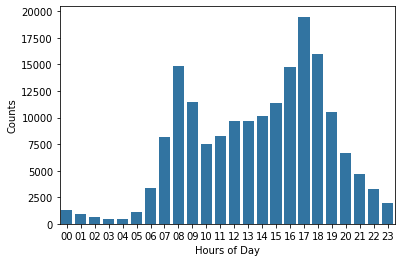

In [22]:
# Trip distribution over hours

base_color = sns.color_palette()[0]
sns.countplot(data = df_clean , x ='start_hour' , color = base_color)
plt.xlabel('Hours of Day')
plt.ylabel('Counts');

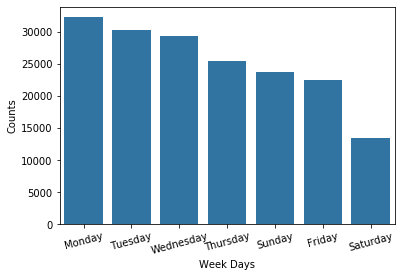

In [23]:
# Trip distribution over week days

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_day'] = df_clean['start_day'].astype(weekdaycat)

base_color = sns.color_palette()[0]
order = df_clean['start_day'].value_counts().index

sns.countplot(data = df_clean , x ='start_day' , color = base_color, order = order)
plt.xlabel('Week Days')
plt.ylabel('Counts')
plt.xticks(rotation = 15);

In the Months of March & April, 
* The **trip distribution over hours** is high at two times, in the evening (i.e, 4 P.M to 7 P.M) and in the morning (i.e, 7 A.M to 10 A.M) and is low during the night time.
* The **Trip distribution over week days** is high at Monday, Tuesday and Wednesday and is low at Saturday.

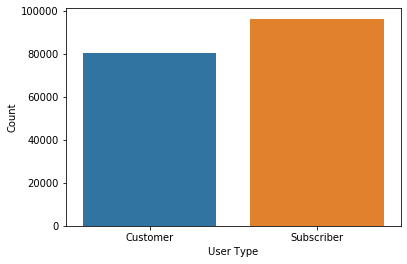

In [24]:
sns.countplot(data = df_clean , x = 'user_type')
plt.xlabel('User Type')
plt.ylabel('Count');

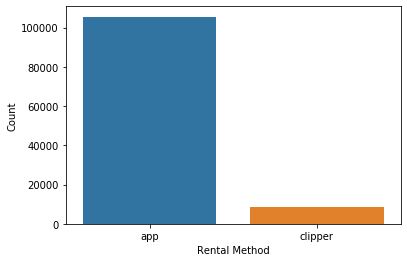

In [25]:
sns.countplot(data = df_clean, x = 'rental_access_method')
plt.xlabel('Rental Method')
plt.ylabel('Count');

In [26]:
df_clean['duration_min'].describe()

count    176799.000000
mean         13.869965
std          25.469611
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max        1407.000000
Name: duration_min, dtype: float64

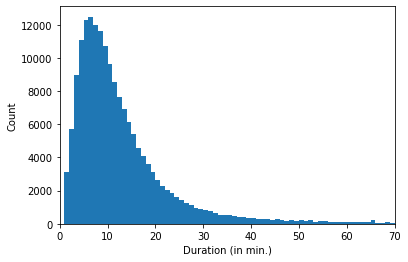

In [27]:
# Trip duration in minutes

bins = np.arange(1 ,df_clean['duration_min'].max()+3, 1 )
plt.hist(data = df_clean,x = 'duration_min' , bins = bins)
plt.xlim((0,70))
plt.xlabel('Duration (in min.)')
plt.ylabel('Count');

From the above Visualizations : 
* It looks like Most of the riders are `Subscriber`
* The Mode of rental accessed is from the `app`
* Majority of trip duration is less than `One Hour`.

In [28]:
# Removing the outliers

df_clean = df_clean.query('duration_min <= 60')
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173566 entries, 3 to 176798
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173566 non-null  int64         
 1   start_time               173566 non-null  datetime64[ns]
 2   end_time                 173566 non-null  datetime64[ns]
 3   start_station_id         173566 non-null  object        
 4   start_station_latitude   173566 non-null  float64       
 5   start_station_longitude  173566 non-null  float64       
 6   end_station_id           173566 non-null  object        
 7   end_station_latitude     173566 non-null  float64       
 8   end_station_longitude    173566 non-null  float64       
 9   bike_id                  173566 non-null  object        
 10  user_type                173566 non-null  category      
 11  rental_access_method     112189 non-null  category      
 12  duration_min    

<a id='bi'></a>
> ## Bivariate Exploration
How does the trip duration distribution vary between customers and subscribers?

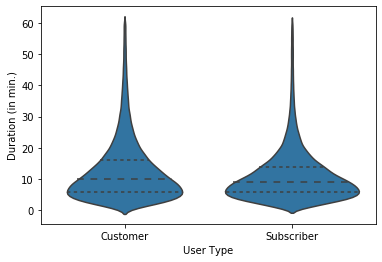

In [29]:
sns.violinplot(data = df_clean, x = 'user_type' , y = 'duration_min', color = base_color, inner = 'quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (in min.)');

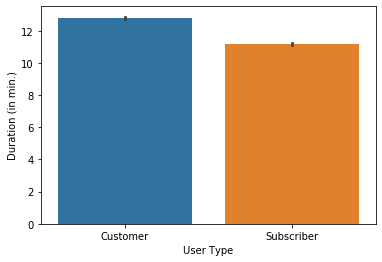

In [30]:
sns.barplot(data = df_clean, x = 'user_type' , y = 'duration_min')
plt.xlabel('User Type')
plt.ylabel('Duration (in min.)');

The trip duration for subscriber is short and it over quickly as compare to customers as they rented the bikes for loger time duration.


Average Trip Duration on Weekdays

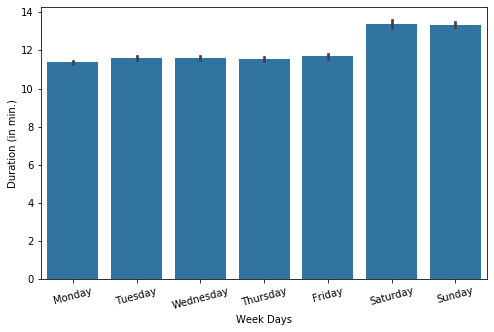

In [31]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_day'] = df_clean['start_day'].astype(weekdaycat)

fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df_clean , x = 'start_day' , y = 'duration_min', color = base_color, ax =ax)
plt.xlabel('Week Days')
plt.ylabel('Duration (in min.)')
plt.xticks(rotation = 15);

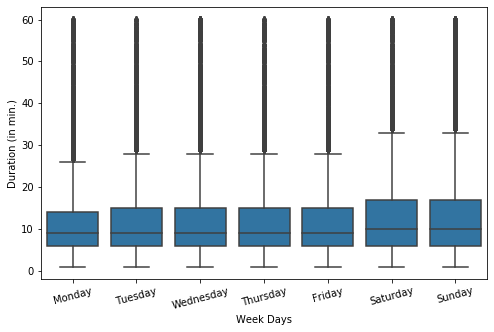

In [32]:
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
base_color = sns.color_palette()[0]
sns.boxplot(data = df_clean, x = 'start_day', y = 'duration_min', color = base_color, ax = ax)
plt.xlabel('Week Days')
plt.ylabel('Duration (in min.)')
plt.xticks(rotation = 15);

The riding trips are much shorter on Monday through Friday compared to weekends. It indicates that most people are more flexible on weekends than the weekdays.

Average trip duration by hour

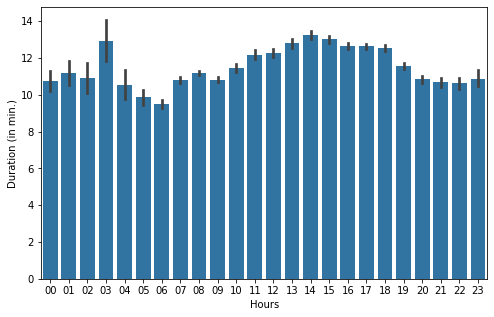

In [36]:
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df_clean , x = 'start_hour' , y = 'duration_min', color = base_color,ax = ax)
plt.xlabel('Hours')
plt.ylabel('Duration (in min.)');

* The duration of trips are higher at evening i.e, 4 P.M to 6 P.M.
* It's also high at 3 A.M, It may be because of empty roads and Sea of Stars in the sky.

Weekly Usage between Subscriber and Customer.

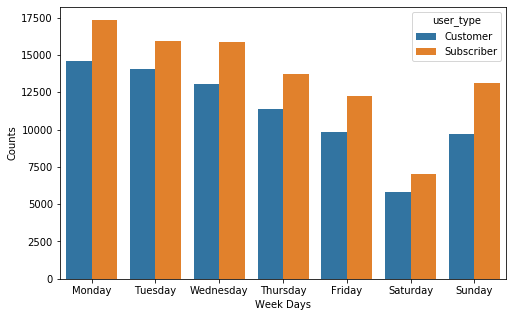

In [37]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_day'] = df_clean['start_day'].astype(weekdaycat)

fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df_clean , x = 'start_day', hue = 'user_type', ax = ax)
plt.xlabel('Week Days')
plt.ylabel('Counts');

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

Daily Usage between Subscriber and regular Customer.

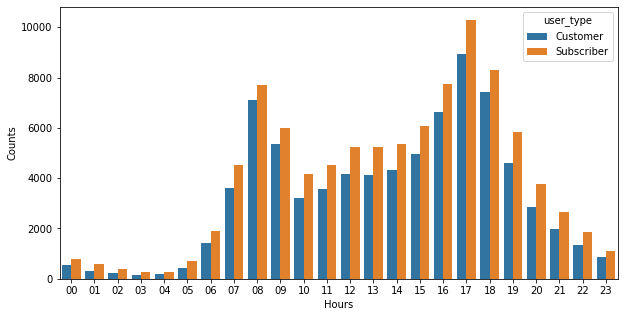

In [38]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df_clean , x = 'start_hour', hue = 'user_type', ax = ax)
plt.xlabel('Hours')
plt.ylabel('Counts');

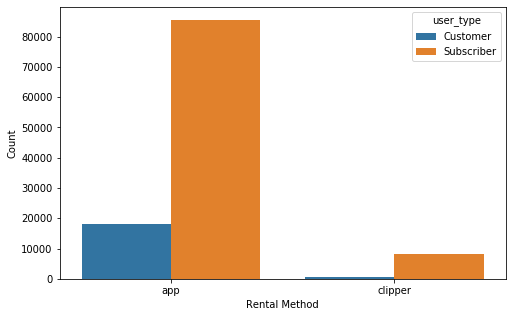

In [39]:
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data = df_clean , x = 'rental_access_method', hue = 'user_type', ax = ax)
plt.xlabel('Rental Method')
plt.ylabel('Count');

From the plot it looks like the rental method is done mostly from apps rather than clipper and most of them are Subscribers'.

<a id='multi'></a>
> ## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

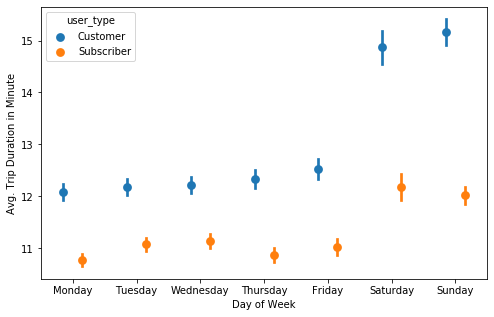

In [40]:
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(data = df_clean, x='start_day', y='duration_min', hue='user_type',ax = ax, dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

How does the hourly usage vary during weekdays for customers and subscribers?

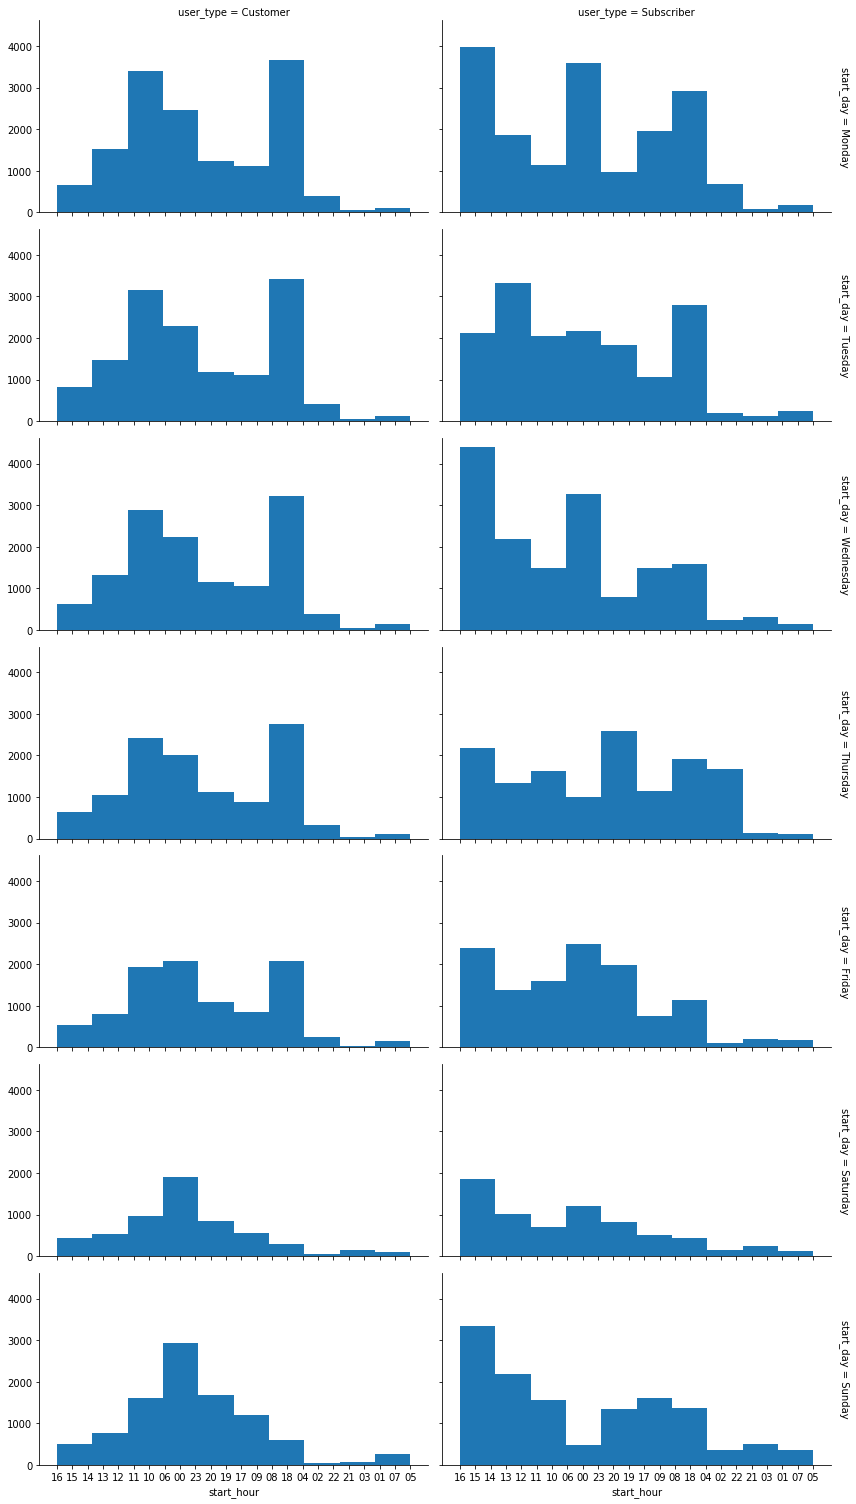

In [41]:
g = sns.FacetGrid(data = df_clean ,row = 'start_day', col ='user_type' , margin_titles = True, aspect = 2)
g.map(plt.hist, 'start_hour');

<Figure size 432x288 with 0 Axes>

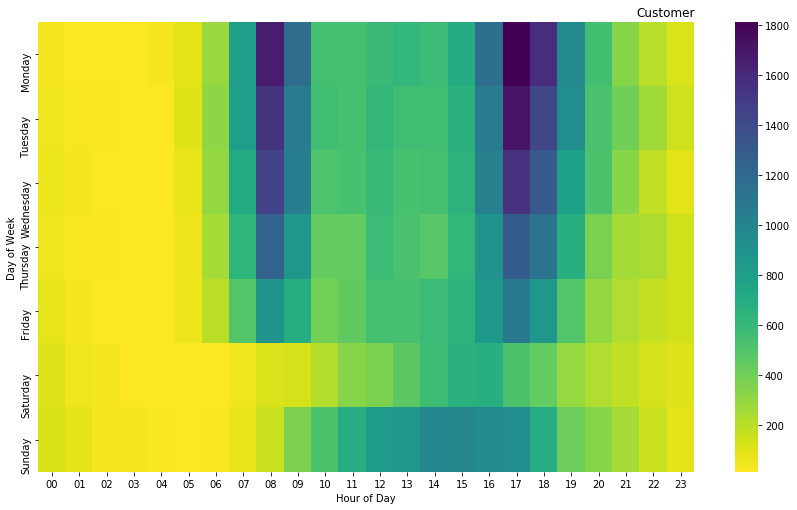

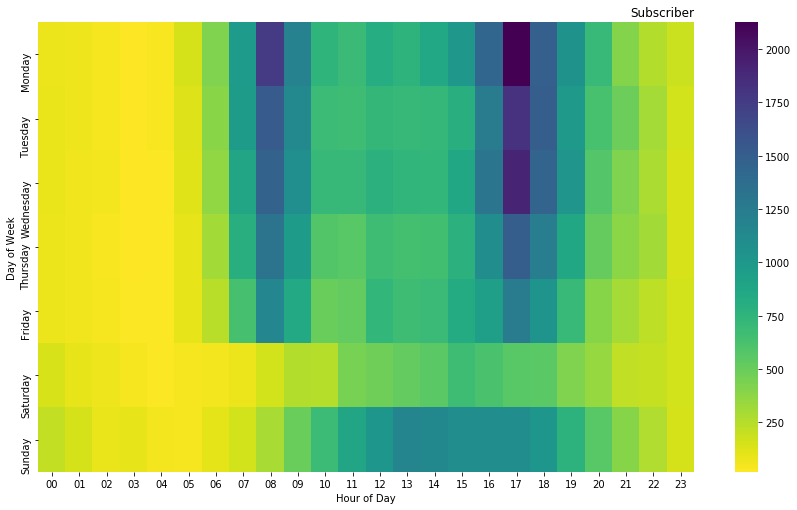

In [44]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers');

f, axs = plt.subplots(1,figsize=(14.70, 8.27));
customers = df_clean.query('user_type == "Customer"');
ct_counts = customers.groupby(['start_day', 'start_hour']).size();
ct_counts = ct_counts.reset_index(name='count');
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count');
sns.heatmap(ct_counts, cmap='viridis_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

f, axs = plt.subplots(1,figsize=(14.70, 8.27));
subscribers = df_clean.query('user_type == "Subscriber"');
st_counts = subscribers.groupby(['start_day', 'start_hour']).size();
st_counts = st_counts.reset_index(name='count');
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count');
sns.heatmap(st_counts, cmap='viridis_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very similar usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday as well as customers also ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.

In [43]:
df_clean.to_csv('CommDataFindings.csv', index = False)